# PP3: Pandas

## Section 1: Getting and knowing your data

### Step 1. Import the necessary libraries

In [76]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user).

### Step 3. Assign it to a variable called users and use the 'user_id' as index

In [77]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep='|', index_col='user_id')

### Step 4. See the first 25 entries

In [78]:
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### Step 5. See the last 10 entries

In [4]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


### Step 6. What is the number of observations in the dataset?

In [62]:
len(users)

943

### Step 7. What is the number of columns in the dataset?

In [66]:
len(users.columns)

4

### Step 8. Print the name of all the columns.

In [64]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

### Step 9. How is the dataset indexed?

In [63]:
users.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
      dtype='int64', name='user_id', length=943)

### Step 10. What is the data type of each column?

In [67]:
users.dtypes

,0
age,int64
gender,object
occupation,object
zip_code,object


### Step 11. Print only the occupation column

In [68]:
users['occupation']

,occupation
user_id,
1,technician
2,other
3,writer
4,technician
5,other
...,...
939,student
940,administrator
941,student


### Step 12. How many different occupations are in this dataset?

In [69]:
users['occupation'].nunique()

21

### Step 13. What is the most frequent occupation?

In [70]:
users['occupation'].value_counts().idxmax()

'student'

### Step 14. Summarize the DataFrame.

In [71]:
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


### Step 15. Summarize all the columns

In [72]:
users.describe(include='all')

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


### Step 16. Summarize only the occupation column

In [73]:
users['occupation'].describe()

,occupation
count,943
unique,21
top,student
freq,196


### Step 17. What is the mean age of users?

In [74]:
users['age'].mean()

np.float64(34.05196182396607)

### Step 18. What is the age with least occurrence?

In [75]:
least_common_age = users['age'].value_counts().idxmin()
least_common_age

np.int64(7)

## Section 2: Filtering and Sorting

### Step 1. Import the necessary libraries

In [79]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv).

### Step 3. Assign it to a variable called euro12.

In [80]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### Step 4. Select only the Goal column.

In [46]:
(euro12['Goals'])

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


### Step 5. How many team participated in the Euro2012?

In [28]:
(len(euro12))

16

### Step 6. What is the number of columns in the dataset?

In [29]:
(len(euro12.columns))

35

### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [59]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [57]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


### Step 9. Calculate the mean Yellow Cards given per Team

In [43]:
discipline['Yellow Cards'].mean()

np.float64(7.4375)

### Step 10. Filter teams that scored more than 6 goals

In [42]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11. Select the teams that start with G

In [41]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12. Select the first 7 columns

In [39]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Step 13. Select all columns except the last 3.

In [38]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [60]:
shooting_accuracy = euro12.loc[
    euro12['Team'].isin(['England', 'Italy', 'Russia']),
    ['Team', 'Shooting Accuracy']
]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Section 3: Grouping

### Step 1. Import the necessary libraries

In [87]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv).

### Step 3. Assign it to a variable called drinks.

In [81]:
drinks = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv")
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### Step 4. Which continent drinks more beer on average?

In [89]:
drinks.groupby('continent')['beer_servings'].mean().sort_values(ascending=False)

,beer_servings
continent,
EU,193.777778
SA,175.083333
OC,89.687500
AF,61.471698
AS,37.045455


### Step 5. For each continent print the statistics for wine consumption.

In [90]:
drinks.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [97]:
drinks.groupby('continent').mean(numeric_only=True)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [92]:
drinks.groupby('continent').median(numeric_only=True)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [95]:
drinks['spirit_servings'].agg(['mean', 'min', 'max'])
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


## Section 4: Apply

### Step 1. Import the necessary libraries

In [99]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv).

### Step 3. Assign it to a variable called crime.

In [100]:
crime = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv")
crime

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


### Step 4. What is the type of the columns?

In [101]:
crime.dtypes

,0
Year,int64
Population,int64
Total,int64
Violent,int64
Property,int64
Murder,int64
Forcible_Rape,int64
Robbery,int64
Aggravated_assault,int64
Burglary,int64


##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [106]:
crime['Year'] = pd.to_datetime(crime['Year'], format='%Y')
crime.dtypes

,0
Year,datetime64[ns]
Population,int64
Total,int64
Violent,int64
Property,int64
Murder,int64
Forcible_Rape,int64
Robbery,int64
Aggravated_assault,int64
Burglary,int64


### Step 6. Set the Year column as the index of the dataframe

In [107]:
crime.set_index('Year', inplace=True)
crime.index

DatetimeIndex(['1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01'],
              dtype

### Step 7. Delete the Total column

In [108]:
crime.drop('Total', axis=1, inplace=True)
crime.columns

Index(['Population', 'Violent', 'Property', 'Murder', 'Forcible_Rape',
       'Robbery', 'Aggravated_assault', 'Burglary', 'Larceny_Theft',
       'Vehicle_Theft'],
      dtype='object')

### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [109]:
crime['Decade'] = (crime.index.year // 10) * 10
crime_decade = crime.drop(columns='Population').groupby('Decade').sum()
population_per_decade = crime.groupby('Decade')['Population'].mean()
crime_decade['Population'] = population_per_decade
crime_decade

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Population
Decade,,,,,,,,,,
1960,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100,191505317.5
1970,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900,212119329.8
1980,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411,237137006.9
1990,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418,261282525.8
2000,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834,294796911.7
2010,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080,314029261.4


### Step 9. What is the most dangerous decade to live in the US?

In [110]:
crime_decade['Total_Crimes'] = crime_decade.drop(columns='Population').sum(axis=1)
most_dangerous_decade = crime_decade['Total_Crimes'].idxmax()
print(f"The most dangerous decade to live in the US was the {most_dangerous_decade}s.")

The most dangerous decade to live in the US was the 1990s.


## Section 5: Merge

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Create the 3 DataFrames based on the following raw data

In [114]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

print("DataFrame 1:\n", data1, "\n")
print("DataFrame 2:\n", data2, "\n")
print("DataFrame 3:\n", data3)

DataFrame 1:
   subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches 

DataFrame 2:
   subject_id first_name last_name
0          4      Billy    Bonder
1          5      Brian     Black
2          6       Bran   Balwner
3          7      Bryce     Brice
4          8      Betty    Btisan 

DataFrame 3:
   subject_id  test_id
0          1       51
1          2       15
2          3       15
3          4       61
4          5       16
5          7       14
6          8       15
7          9        1
8         10       61
9         11       16


### Step 3. Assign each to a variable called data1, data2, data3

In [130]:
data1 = pd.DataFrame(raw_data_1)
data2 = pd.DataFrame(raw_data_2)
data3 = pd.DataFrame(raw_data_3)

data1, data2, data3

(  subject_id first_name last_name
 0          1       Alex  Anderson
 1          2        Amy  Ackerman
 2          3      Allen       Ali
 3          4      Alice      Aoni
 4          5     Ayoung   Atiches,
   subject_id first_name last_name
 0          4      Billy    Bonder
 1          5      Brian     Black
 2          6       Bran   Balwner
 3          7      Bryce     Brice
 4          8      Betty    Btisan,
   subject_id  test_id
 0          1       51
 1          2       15
 2          3       15
 3          4       61
 4          5       16
 5          7       14
 6          8       15
 7          9        1
 8         10       61
 9         11       16)

### Step 4. Join the two dataframes along rows and assign all_data

In [131]:
all_data = pd.concat([data1, data2], ignore_index=True)
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


### Step 5. Join the two dataframes along columns and assing to all_data_col

In [132]:
all_data_col = pd.concat([data1, data2], axis=1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### Step 6. Print data3

In [134]:
print(data3)

  subject_id  test_id
0          1       51
1          2       15
2          3       15
3          4       61
4          5       16
5          7       14
6          8       15
7          9        1
8         10       61
9         11       16


### Step 7. Merge all_data and data3 along the subject_id value

In [140]:
merged_data = pd.merge(all_data, data3, on='subject_id')
merged_data

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,5,Ayoung,Atiches,16
5,4,Billy,Bonder,61
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


### Step 8. Merge only the data that has the same 'subject_id' on both data1 and data2

In [137]:
common_data = pd.merge(data1, data2, on='subject_id', how='inner')
common_data

  subject_id first_name_x last_name_x first_name_y last_name_y
0          4        Alice        Aoni        Billy      Bonder
1          5       Ayoung     Atiches        Brian       Black


### Step 9. Merge all values in data1 and data2, with matching records from both sides where available.

In [138]:
merged_all = pd.merge(data1, data2, on='subject_id', how='outer', suffixes=('_data1', '_data2'))
merged_all

,subject_id,first_name_data1,last_name_data1,first_name_data2,last_name_data2
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


## Section 6: Stats

### Introduction:

The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise
easier, in particular for the bonus question.

You should be able to perform all of these operations without using
a for loop or other looping construct.


1. The data in 'wind.data' has the following format:

In [142]:
"""
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71
"""

'\nYr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n'

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.   

   More information about the dataset go [here](wind.desc).

### Step 1. Import the necessary libraries

In [143]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data)

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [173]:
import pandas as pd

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
data = pd.read_csv(url, sep="\s+", na_values="NaN")

data['Yr'] = data['Yr'].apply(lambda x: x + 1900 if x < 100 else x)

data['Date'] = pd.to_datetime(dict(year=data['Yr'], month=data['Mo'], day=data['Dy']))

data.set_index('Date', inplace=True)
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)


print(data.index.dtype)
data.head()


datetime64[ns]


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [166]:
print(data.index.dtype)

datetime64[ns]


### Step 6. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below.

In [174]:
missing_values = data.isna().sum()
missing_values

,0
RPT,6
VAL,3
ROS,2
KIL,5
SHA,2
BIR,0
DUB,3
CLA,2
MUL,3
CLO,1


### Step 7. Compute how many non-missing values there are in total.

In [175]:
non_missing_total = data.notna().sum().sum()
non_missing_total

np.int64(78857)

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [176]:
mean_wind = data.mean().mean()
mean_wind

np.float64(10.227982360836938)

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

#### A different set of numbers for each location.

In [177]:
loc_stats = data.agg(['min', 'max', 'mean', 'std']).transpose()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [178]:
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
day_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


### Step 11. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [180]:
jan_1961_1962 = data[(data.index.month == 1) & (data.index.year.isin([1961, 1962]))]
january_avg_per_location = jan_1961_1962.mean()
january_avg_per_location

,0
RPT,14.812131
VAL,12.583934
ROS,13.011774
KIL,7.637419
SHA,11.438000
BIR,8.654032
DUB,12.698387
CLA,9.425574
MUL,9.377903
CLO,10.803065


### Step 12. Downsample the record to a yearly frequency for each location.

In [182]:
yearly_avg = data.resample('YE').mean()
yearly_avg.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644


### Step 13. Downsample the record to a monthly frequency for each location.

In [185]:
monthly_avg = data.resample('ME').mean()
monthly_avg.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613


### Step 14. Downsample the record to a weekly frequency for each location.

In [186]:
weekly_avg = data.resample('W').mean()
weekly_avg.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000


### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [187]:
weekly_stats = data.resample('W-MON').agg(['min', 'max', 'mean', 'std'])
weekly_stats_52 = weekly_stats.iloc[:52]
weekly_stats_52

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-02  14.71  15.04  14.875000  0.233345  14.96  14.96  14.960000   
1961-01-09  10.58  18.50  13.237143  2.596592   6.63  16.88  11.392857   
1961-01-16   9.04  19.75  13.017143  3.858751   3.54  12.08   9.027143   
1961-01-23   4.92  19.83  13.221429  5.349631   3.42  14.37   9.678571   
1961-01-30  12.21  25.04  19.158333  5.499583  11.17  23.91  16.350000   
1961-02-06  10.58  24.50  18.582857  5.499102   9.46  24.21  16.792857   
1961-02-13  16.00  24.54  19.398571  3.198809  11.54  21.42  16.267143   
1961-02-20   6.04  17.08  13.492857  4.032186  11.08  20.17  13.860000   
1961-02-27   7.79  25.80  15.215714  7.024701   7.08  21.50  13.952857   
1961-03-06   4.88  13.33  11.227143  2.931380   8.08  17.00  12.195714   
1961-03-13   6.46  14.79  10.431667  3.036837   8.33  16.96  12.044286   
1961-03-20   4.92  16.88  12.274286  3.902264   9.46  15.54  13.368571   
1961-03-27   5.88  15.00   8.442857  3.306210   2.58  11.63   7.400000   
1961-04-03   7.62  18.25  12.101429  4.777361   4.25  16.29   9.585714   
1961-04-10   4.50  18.12  10.601429  4.860691   4.83  14.62  10.111429   
1961-04-17   4.00  15.50   8.715714  4.221259   3.71  12.25   7.840000   
1961-04-24   8.17  21.09  13.412857  4.548409   5.66  15.41  11.057143   
1961-05-01   4.08  16.29  11.021429  4.840032   6.50  14.46  10.632857   
1961-05-08   9.87  23.00  14.927143  5.108293  10.08  19.79  13.427143   
1961-05-15   3.54  11.00   7.320000  2.738229   3.92  15.12   7.832857   
1961-05-22   4.88  15.04   7.744286  3.639454   3.58  10.17   5.590000   
1961-05-29   4.96  12.04   8.982857  2.935238   3.96  12.50   7.817143   
1961-06-05   7.00  15.92  10.255714  3.061840   4.75  11.54   8.102857   
1961-06-12   8.29  14.42  10.584286  2.305847   6.83   9.96   8.355714   
1961-06-19   6.13  14.33  10.524286  3.036099   4.12  14.54   9.465714   
1961-06-26   4.00  13.13   7.947143  2.944439   3.25  11.42   6.828571   
1961-07-03   7.21  15.34  10.605000  3.148706   6.34  14.37   9.362857   
1961-07-10   7.29  17.50  10.757143  3.428827   3.75  10.75   6.832857   
1961-07-17   4.25  22.50  16.054286  6.419439   3.08  19.29  12.834286   
1961-07-24   3.04   7.00   4.595714  1.490580   2.92   6.79   4.477143   
1961-07-31   6.13  16.08  10.657143  4.068750   4.83  13.79   8.742857   
1961-08-07   2.88  16.08  10.185714  4.134585   4.42  15.79   8.465714   
1961-08-14   6.63  16.42  12.315000  3.351697   6.71  10.88   8.864286   
1961-08-21  13.13  18.91  15.855714  2.473654   7.25  14.58  11.094286   
1961-08-28   7.67  14.33  11.707143  2.366240   6.87  22.00  12.490000   
1961-09-04   3.63  14.46   7.738571  3.904247   1.13  16.04   6.112857   
1961-09-11   5.00  17.62  10.981429  4.961802   3.92  13.59   9.567143   
1961-09-18   5.33  28.75  17.142857  7.698287   4.21  22.08  13.838571   
1961-09-25   6.92  10.34   8.584286  1.379080   2.92  13.62   8.398571   
1961-10-02  11.34  23.21  16.580000  3.958316   6.96  13.62  10.653333   
1961-10-09   3.13  17.12  11.682857  5.958450   3.63  16.96   9.334286   
1961-10-16   3.71  14.46  10.125000  3.867985   6.13  13.25   9.728571   
1961-10-23  10.46  28.62  20.212857  7.330020   3.75  19.46  13.755714   
1961-10-30   4.33  26.42  14.672857  8.168949   2.75  21.25  10.910000   
1961-11-06   5.88  15.79  11.362857  3.564135   3.96  13.46   9.178571   
1961-11-13   5.46  16.08  11.434286  4.099930   5.50  13.00   8.714286   
1961-11-20   7.50  13.67  10.202857  2.096853   3.29  10.67   6.564286   
1961-11-27   5.75  14.29   8.738571  3.149039   4.33  11.79   7.534286   
1961-12-04   8.58  23.75  14.738571  6.403073   5.96  18.71  12.204286   
1961-12-11  10.83  23.71  17.150000  4.638470   9.21  21.37  14.274286   
1961-12-18   9.29  18.05  13.675714  3.059356   8.63  17.62  12.794286   
1961-12-25  11.46 

## Section 7: Visualization

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic

In [190]:
titanic = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 4. Set PassengerId as the index

In [195]:
print(titanic.index.name)

PassengerId


### Step 5. Create a pie chart presenting the male/female proportion

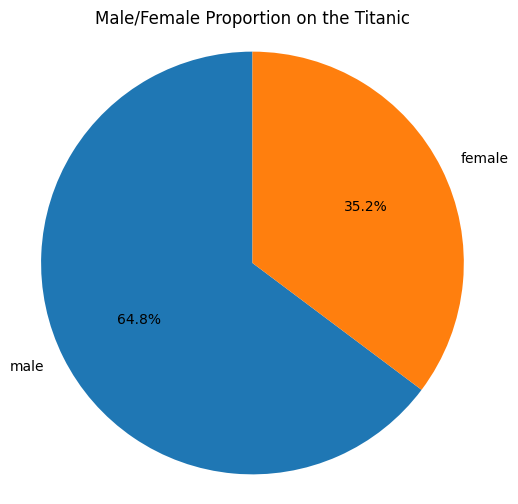

In [197]:
gender_counts = titanic['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Male/Female Proportion on the Titanic')
plt.axis('equal')
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

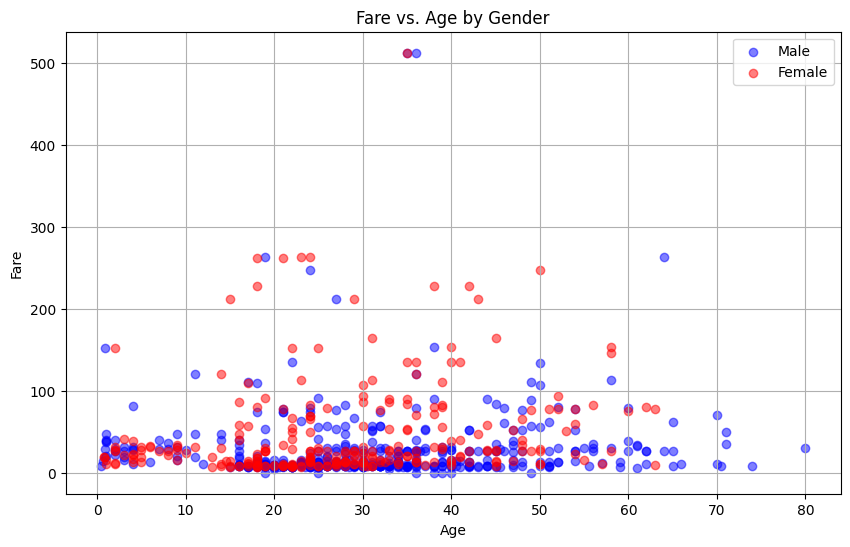

In [198]:
male = titanic[titanic['Sex'] == 'male']
female = titanic[titanic['Sex'] == 'female']

plt.figure(figsize=(10, 6))

plt.scatter(male['Age'], male['Fare'], c='blue', label='Male', alpha=0.5)

plt.scatter(female['Age'], female['Fare'], c='red', label='Female', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs. Age by Gender')
plt.legend()
plt.grid(True)
plt.show()

### Step 7. How many people survived?

In [200]:
num_survived = titanic['Survived'].sum()
num_survived

np.int64(342)

### Step 8. Create a histogram with the Fare payed

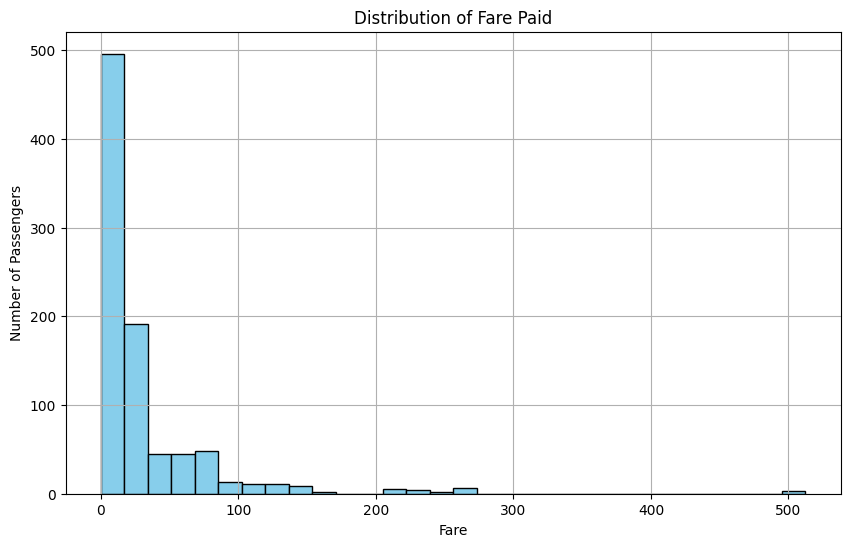

In [201]:
plt.figure(figsize=(10, 6))
plt.hist(titanic['Fare'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Fare Paid')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

### BONUS: Create your own question and answer it.

## Section 8: Creating Series and DataFrames

### Introduction:

This time you will create the data.



### Step 1. Import the necessary libraries

In [202]:
import pandas as pd

### Step 2. Create a data dictionary that looks like the DataFrame below

In [215]:
pokemon_dict = {
    'evolution': ['Ivysaur', 'Charmeleon', 'Wartortle'],
    'hp': [45, 39, 44],
    'name': ['Bulbasaur', 'Charmander', 'Squirtle'],
    'pokedex': [1, 4, 7],
    'type': ['Grass/Poison', 'Fire', 'Water']
}

pokemon_df = pd.DataFrame(pokemon_dict)

pokemon_df

,evolution,hp,name,pokedex,type
0,Ivysaur,45,Bulbasaur,1,Grass/Poison
1,Charmeleon,39,Charmander,4,Fire
2,Wartortle,44,Squirtle,7,Water


### Step 3. Assign it to a variable called pokemon

In [216]:
pokemon = pd.DataFrame(pokemon_dict)
pokemon

,evolution,hp,name,pokedex,type
0,Ivysaur,45,Bulbasaur,1,Grass/Poison
1,Charmeleon,39,Charmander,4,Fire
2,Wartortle,44,Squirtle,7,Water


### Step 4. Ops...it seems the DataFrame columns are in alphabetical order. Place  the order of the columns as name, type, hp, evolution, pokedex

In [217]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution', 'pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,Grass/Poison,45,Ivysaur,1
1,Charmander,Fire,39,Charmeleon,4
2,Squirtle,Water,44,Wartortle,7


### Step 5. Add another column called place, and insert what you have in mind.

In [219]:
pokemon.loc[:, 'place'] = ['Forest', 'Volcano', 'Lake']
pokemon


,name,type,hp,evolution,pokedex,place
0,Bulbasaur,Grass/Poison,45,Ivysaur,1,Forest
1,Charmander,Fire,39,Charmeleon,4,Volcano
2,Squirtle,Water,44,Wartortle,7,Lake


### Step 6. Present the type of each column

In [220]:
pokemon.dtypes

,0
name,object
type,object
hp,int64
evolution,object
pokedex,int64
place,object


### BONUS: Create your own question and answer it.

## Section: 9 Time Series

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [235]:
import pandas as pd
import matplotlib.pyplot as plt


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [223]:
dataset = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")
dataset

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 3. Assign it to a variable apple

In [224]:
apple = dataset
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [225]:
apple.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


### Step 5. Transform the Date column as a datetime type

In [226]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 6.  Set the date as the index

In [227]:
apple.set_index('Date', inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [228]:
duplicate_dates = apple.index.duplicated().sum()
duplicate_dates

np.int64(0)

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [229]:
apple.sort_index(inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [231]:
last_business_day = apple.resample('BME').last()
last_business_day

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


### Step 10.  What is the difference in days between the first day and the oldest

In [232]:
most_recent = apple.index[-1]
oldest = apple.index[0]

difference = most_recent - oldest
difference

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [234]:
unique_months = apple.index.to_period('M').nunique()
unique_months

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

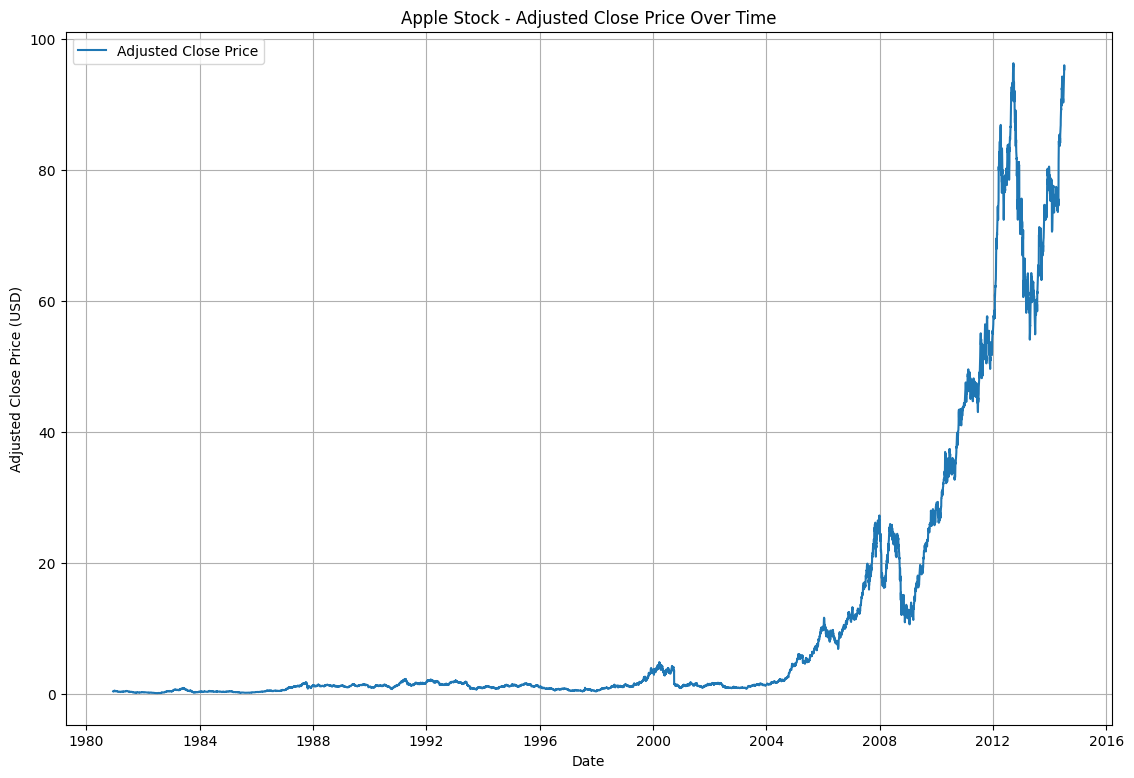

In [236]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'], label='Adjusted Close Price')
plt.title('Apple Stock - Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

## Section 10: Deleting

### Introduction:

This exercise is a adaptation from the UCI Wine dataset.
The only pupose is to practice deleting data with pandas.

### Step 1. Import the necessary libraries

In [265]:
import pandas as pd
import numpy as np


### Step 2. Import the dataset from this [address](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data).

### Step 3. Assign it to a variable called wine

In [260]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Step 4. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [261]:
columns_to_delete = [0, 3, 6, 8, 10, 12, 13]

wine = wine.drop(wine.columns[columns_to_delete], axis=1)

wine

,1,2,4,5,7,9,11
0,14.23,1.71,15.6,127,3.06,2.29,1.04
1,13.20,1.78,11.2,100,2.76,1.28,1.05
2,13.16,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95,0.61,1.06,0.64
174,13.40,3.91,23.0,102,0.75,1.41,0.70
175,13.27,4.28,20.0,120,0.69,1.35,0.59
176,13.17,2.59,20.0,120,0.68,1.46,0.60


### Step 5. Assign the columns as below:

The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue

In [264]:
wine.columns = [
    'alcohol',
    'malic_acid',
    'alcalinity_of_ash',
    'magnesium',
    'flavanoids',
    'proanthocyanins',
    'hue'
]
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,14.23,1.71,15.6,127,3.06,2.29,1.04
1,13.20,1.78,11.2,100,2.76,1.28,1.05
2,13.16,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95,0.61,1.06,0.64
174,13.40,3.91,23.0,102,0.75,1.41,0.70
175,13.27,4.28,20.0,120,0.69,1.35,0.59
176,13.17,2.59,20.0,120,0.68,1.46,0.60


### Step 6. Set the values of the first 3 rows from alcohol as NaN

In [268]:
wine.loc[0:2, 'alcohol'] = np.nan
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127,3.06,2.29,1.04
1,NaN,1.78,11.2,100,2.76,1.28,1.05
2,NaN,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95,0.61,1.06,0.64
174,13.40,3.91,23.0,102,0.75,1.41,0.70
175,13.27,4.28,20.0,120,0.69,1.35,0.59
176,13.17,2.59,20.0,120,0.68,1.46,0.60


### Step 7. Now set the value of the rows 3 and 4 of magnesium as NaN

In [269]:
wine.loc[3:4, 'magnesium'] = np.nan
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,1.71,15.6,127.0,3.06,2.29,1.04
1,NaN,1.78,11.2,100.0,2.76,1.28,1.05
2,NaN,2.36,18.6,101.0,3.24,2.81,1.03
3,14.37,1.95,16.8,NaN,3.49,2.18,0.86
4,13.24,2.59,21.0,NaN,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### Step 8. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [271]:
wine['alcohol'] = wine['alcohol'].fillna(10)
wine['magnesium'] = wine['magnesium'].fillna(100)
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,101.0,3.24,2.81,1.03
3,14.37,1.95,16.8,100.0,3.49,2.18,0.86
4,13.24,2.59,21.0,100.0,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### Step 9. Count the number of missing values

In [273]:
missing_values = wine.isna().sum()
missing_values

,0
alcohol,0
malic_acid,0
alcalinity_of_ash,0
magnesium,0
flavanoids,0
proanthocyanins,0
hue,0


### Step 10.  Create an array of 10 random numbers up until 10

In [275]:
random_array = np.random.randint(0, 10, size=10)
random_array

array([6, 2, 2, 0, 7, 6, 5, 4, 6, 8])

### Step 11.  Use random numbers you generated as an index and assign NaN value to each of cell.

In [277]:
random_indices = np.random.randint(0, len(wine), size=10)
wine.loc[random_indices, 'flavanoids'] = np.nan
wine.loc[random_indices]

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
57,13.29,1.97,16.8,102.0,NaN,1.66,1.07
104,12.51,1.73,20.5,85.0,NaN,1.48,1.04
69,12.21,1.19,16.8,151.0,NaN,2.50,1.28
85,12.67,0.98,18.0,99.0,NaN,1.46,1.23
20,14.06,1.63,16.0,126.0,NaN,2.10,1.09
112,11.76,2.68,20.0,103.0,NaN,1.05,1.23
131,12.88,2.99,20.0,104.0,NaN,0.83,0.74
111,12.52,2.43,21.0,88.0,NaN,1.22,0.90
114,12.08,1.39,22.5,84.0,NaN,1.04,0.93
114,12.08,1.39,22.5,84.0,NaN,1.04,0.93


### Step 12.  How many missing values do we have?

In [278]:
missing_per_column = wine.isna().sum()
total_missing = missing_per_column.sum()
total_missing


np.int64(9)

### Step 13. Delete the rows that contain missing values

In [279]:
wine = wine.dropna()
wine


,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,101.0,3.24,2.81,1.03
3,14.37,1.95,16.8,100.0,3.49,2.18,0.86
4,13.24,2.59,21.0,100.0,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### Step 14. Print only the non-null values in alcohol

In [281]:
non_null_alcohol = wine['alcohol'].dropna()
non_null_alcohol

,alcohol
0,10.00
1,10.00
2,10.00
3,14.37
4,13.24
...,...
173,13.71
174,13.40
175,13.27
176,13.17


### Step 15.  Reset the index, so it starts with 0 again

In [282]:
wine.reset_index(drop=True, inplace=True)
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,1.71,15.6,127.0,3.06,2.29,1.04
1,10.00,1.78,11.2,100.0,2.76,1.28,1.05
2,10.00,2.36,18.6,101.0,3.24,2.81,1.03
3,14.37,1.95,16.8,100.0,3.49,2.18,0.86
4,13.24,2.59,21.0,100.0,2.69,1.82,1.04
...,...,...,...,...,...,...,...
164,13.71,5.65,20.5,95.0,0.61,1.06,0.64
165,13.40,3.91,23.0,102.0,0.75,1.41,0.70
166,13.27,4.28,20.0,120.0,0.69,1.35,0.59
167,13.17,2.59,20.0,120.0,0.68,1.46,0.60
